# <font color='darkblue'>Jane Street Market Prediction</font>
### This is an extensive data analysis for the jane street market dataset, this notebook will go through the train and features csv's for an extensive exploratory data analysis, Also some data cleaning and preprocessing will be done along the way.
### <font color='darkred'>Please note the following:</font> 
- this is a relatively large notebook with a lot of exhaustive analytics as it meant to be that way to give a comprehensive understanding of the dataset so if you are to copy and run it please note that it will take a considerable amount of time to run ( around 50 minutes) so be patient.
- this is an exploratory data analysis so some figures will be kind of complicated, long and full of data as this notebook is meant to help data scientists.
- The PCA / Clustering part is just a starter for exploring the possible alternatives to reduce the features space size and find some patterns in the dadataset in future steps. 


## [The EDA](#eda) will be devided to three main parts:
      

## 1- [General EDA](#general)
  >- [Resp Data Analysis](#resp)
  >- [Date](#date)
  >- [Weight](#weight)

## 2 - [Features Data Analysis](#features)
  >- [Null Values](#nulls)
  >- [Cumulative growth](#growth)
  >- [Multicollinearity](#multicollinearity)
  >- [Outliers](#outlier)
  >- [Feature 0](#f0)


## 3 - [PCA & Clustering](#pcacls)
  >- [PCA](#pca)
  >- [Clustering](#cluster)

### Importing Libraries 

In [1]:
import os
import gc
import sys

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 140)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler as scale
from sklearn.decomposition import PCA
from sklearn.cluster import k_means
from sklearn.model_selection import train_test_split as split 
from sklearn.model_selection import GridSearchCV as Grid
import xgboost as xgb
from sklearn.metrics import (roc_auc_score, precision_score, recall_score, f1_score,
                             confusion_matrix, accuracy_score, roc_curve, auc)

## **Loading Data**

In [2]:
df = pd.read_csv('C:\\Users\\emanu\\Downloads\\jane-street-market-prediction\\train.csv')

In [3]:
#saving the original dataset length
org_len = len(df)
df.head(2)

date     weight    resp_1    resp_2    resp_3    resp_4      resp  \
0     0   0.000000  0.009916  0.014079  0.008773  0.001390  0.006270   
1     0  16.673515 -0.002828 -0.003226 -0.007319 -0.011114 -0.009792   

   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0          1  -1.872746  -2.191242  -0.474163  -0.323046   0.014688   
1         -1  -1.349537  -1.704709   0.068058   0.028432   0.193794   

   feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0  -0.002484        NaN        NaN  -0.989982   -1.055090         NaN   
1   0.138212        NaN        NaN  -0.151877   -0.384952         NaN   

   feature_12  feature_13  feature_14  feature_15  feature_16  feature_17  \
0         NaN   -2.667671   -2.001475   -1.703595   -2.196892         NaN   
1         NaN    1.225838    0.789076    1.110580    1.102281         NaN   

   feature_18  feature_19  feature_20  feature_21  feature_22  feature_23  \
0         NaN    1.483295    1.307466         NaN         NaN    1.175200   
1         NaN   -0.590600   -0.625682         NaN         NaN   -0.543425   

   feature_24  feature_25  feature_26  feature_27  feature_28  feature_29  \
0    0.967805     1.60841    1.319365         NaN         NaN   -0.515073   
1   -0.547486    -0.70660   -0.667806         NaN         NaN    0.910558   

   feature_30  feature_31  feature_32  feature_33  feature_34  feature_35  \
0   -0.448988         NaN         NaN   -2.429812   -2.206423   -3.593120   
1    0.914465         NaN         NaN    2.137454    2.080459    2.819291   

   feature_36  feature_37  feature_38  feature_39  feature_40  feature_41  \
0   -2.868358    0.112697    0.053157   -0.539956   -0.692187    3.491282   
1    2.483965   -0.086755   -0.082687    0.368431    0.469196    5.711996   

   feature_42  feature_43  feature_44  feature_45  feature_46  feature_47  \
0   -1.684889    1.337123   -0.328607    1.689207   -1.052243   -1.870885   
1   -2.215132    0.796703   -1.140081    0.716617   -0.059431   -0.198920   

   feature_48  feature_49  feature_50  feature_51  feature_52  feature_53  \
0   -1.789342   -1.574173   -1.120820   -0.571920   -1.093033    0.703515   
1   -0.326697   -0.381770    1.435607    3.401393    2.486748   -2.014598   

   feature_54  feature_55  feature_56  feature_57  feature_58  feature_59  \
0    5.936281         NaN    3.315812    1.291338    2.468825    2.490069   
1   -0.390588         NaN   -0.027262   -1.886927   -1.706450   -0.888236   

   feature_60  feature_61  feature_62  feature_63  feature_64  feature_65  \
0   -1.148239   -0.961935   -2.263944   -2.158765   -5.012022   -2.006825   
1   -1.138294   -0.954461   -1.350633   -1.459546   -4.564815   -2.651966   

   feature_66  feature_67  feature_68  feature_69  feature_70  feature_71  \
0   -1.284090   -2.141697   -2.054935   -1.851203   -1.431184   -1.634481   
1   -1.620014   -2.240625   -2.147273   -0.255224    3.202946   -0.535872   

   feature_72  feature_73  feature_74  feature_75  feature_76  feature_77  \
0         NaN   -0.373934         NaN    0.559241    0.891368     0.27170   
1         NaN   -0.050948         NaN    0.141089    0.058363     0.13119   

   feature_78  feature_79  feature_80  feature_81  feature_82  feature_83  \
0         NaN   -1.521125         NaN    3.045337    3.260512    0.683558   
1         NaN   -0.121239         NaN    0.677553    0.045842   -0.124616   

   feature_84  feature_85  feature_86  feature_87  feature_88  feature_89  \
0         NaN   -0.109194         NaN    0.488806    1.447504   -2.790902   
1         NaN   -0.007004         NaN   -0.410491   -0.024323   -3.012654   

   feature_90  feature_91  feature_92  feature_93  feature_94  feature_95  \
0         NaN    1.158770         NaN    3.754522    7.137163   -1.863069   
1         NaN    1.157671         NaN    1.297679    1.281956   -2.427595   

   feature_96  feature_97  feature_98  feature_99  feature_100  feature_101  \
0         NaN    0.434466

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328165 entries, 0 to 2328164
Columns: 138 entries, date to ts_id
dtypes: float64(136), int64(2)
memory usage: 2.4 GB


In [5]:
df = df.bfill()
df

date     weight    resp_1    resp_2    resp_3    resp_4      resp  \
0           0   0.000000  0.009916  0.014079  0.008773  0.001390  0.006270   
1           0  16.673515 -0.002828 -0.003226 -0.007319 -0.011114 -0.009792   
2           0   0.000000  0.025134  0.027607  0.033406  0.034380  0.023970   
3           0   0.000000 -0.004730 -0.003273 -0.000461 -0.000476 -0.003200   
4           0   0.138531  0.001252  0.002165 -0.001215 -0.006219 -0.002604   
...       ...        ...       ...       ...       ...       ...       ...   
2328160   488   0.561008 -0.000494  0.000767  0.000106 -0.000580 -0.000367   
2328161   488   0.000000 -0.000183  0.001045  0.000663 -0.001259  0.000700   
2328162   488   0.000000 -0.000552  0.000034 -0.002965 -0.005191 -0.001662   
2328163   488   8.162375 -0.021259 -0.006844 -0.005227 -0.063016 -0.072108   
2328164   488   0.113773  0.017798  0.019369  0.040855  0.118724  0.064495   

         feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0                1  -1.872746  -2.191242  -0.474163  -0.323046   0.014688   
1               -1  -1.349537  -1.704709   0.068058   0.028432   0.193794   
2               -1   0.812780  -0.256156   0.806463   0.400221  -0.614188   
3               -1   1.174378   0.344640   0.066872   0.009357  -1.006373   
4                1  -3.172026  -3.093182  -0.161518  -0.128149  -0.195006   
...            ...        ...        ...        ...        ...        ...   
2328160          1  -3.172026  -3.093182   1.361869   1.897387   0.339858   
2328161          1  -2.506953  -2.407657   1.379505   1.922992   0.353610   
2328162          1  -1.821331  -1.625179   1.220950   1.547512   0.160033   
2328163          1   9.281786   3.926852   5.749009   2.564449   1.138066   
2328164         -1  10.247819   9.068004  -1.640671  -1.225471   0.277676   

         feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0        -0.002484   0.576090   0.303593  -0.989982   -1.055090    3.225978   
1         0.138212   0.576090   0.303593  -0.151877   -0.384952    3.225978   
2        -0.354800   0.576090   0.303593   5.448261    2.668029    3.225978   
3        -0.676458   0.576090   0.303593   4.508206    2.484260    3.225978   
4        -0.143780   0.576090   0.303593   2.683018    1.450991    3.225978   
...            ...        ...        ...        ...         ...         ...   
2328160   0.486158  -0.795005  -1.129894  -2.496830   -1.594847   -0.553510   
2328161   0.505971  -0.732439  -1.026748  -1.739785   -0.956733   -0.429917   
2328162   0.209103  -0.340254  -0.402193  -0.921027   -0.343811   -0.013657   
2328163   0.361735   2.815658   1.296576   6.568486    1.640621    0.881076   
2328164   0.178373   1.196388   1.040738   7.709980    5.271779    2.424785   

         feature_12  feature_13  feature_14  feature_15  feature_16  \
0          3.368788   -2.667671   -2.001475   -1.703595   -2.196892   
1          3.368788    1.225838    0.789076    1.110580    1.102281   
2          3.368788    3.836342    2.183258    3.902698    3.045431   
3          3.368788    2.902176    1.799163    3.192700    2.848359   
4          3.368788    1.257761    0.632336    0.905204    0.575275   
...             ...         ...         ...         ...         ...   
2328160   -0.961549   -1.411543   -1.176864   -1.511103   -1.977782   
2328161   -0.673555   -1.078189   -0.809330   -1.097869   -1.250612   
2328162    0.213589   -0.765949   -0.522166   -0.590067   -0.451199   
2328163   -0.062559    4.001533    1.098655    3.733217    1.225375   
2328164    3.095490    4.911677    3.694773    5.647724    5.660641   

         feature_17  feature_18  feature_19  feature_20  feature_21  \
0          1.452184    0.827972    1.483295    1.307466   -6.785697   
1          1.452184    0.827972   -0.590600   -0.625682   -6.785697   
2          1.452184    0.827972   -1.141082   -0.979962   -6.785697   
3          1.452184    0.827972   -1.401637   -1.428248   -6.

In [6]:
df.head(100)

date     weight    resp_1    resp_2    resp_3    resp_4      resp  \
0      0   0.000000  0.009916  0.014079  0.008773  0.001390  0.006270   
1      0  16.673515 -0.002828 -0.003226 -0.007319 -0.011114 -0.009792   
2      0   0.000000  0.025134  0.027607  0.033406  0.034380  0.023970   
3      0   0.000000 -0.004730 -0.003273 -0.000461 -0.000476 -0.003200   
4      0   0.138531  0.001252  0.002165 -0.001215 -0.006219 -0.002604   
..   ...        ...       ...       ...       ...       ...       ...   
95     0   0.000000  0.000911 -0.000360 -0.000827  0.002923  0.000326   
96     0   1.486238 -0.004751 -0.006700 -0.007839 -0.002412 -0.002133   
97     0   0.000000 -0.002477 -0.004644 -0.005794 -0.001210 -0.002077   
98     0   0.000000 -0.004891 -0.005479 -0.007417 -0.002341 -0.003652   
99     0   0.400002 -0.002196 -0.000159 -0.008011 -0.033877 -0.029856   

    feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0           1  -1.872746  -2.191242  -0.474163  -0.323046   0.014688   
1          -1  -1.349537  -1.704709   0.068058   0.028432   0.193794   
2          -1   0.812780  -0.256156   0.806463   0.400221  -0.614188   
3          -1   1.174378   0.344640   0.066872   0.009357  -1.006373   
4           1  -3.172026  -3.093182  -0.161518  -0.128149  -0.195006   
..        ...        ...        ...        ...        ...        ...   
95          1  -1.886150  -2.279597  -0.627956  -0.375443   0.180172   
96          1  -3.172026  -3.093182   1.013697   0.454213  -0.136189   
97          1   2.363293   0.782278   1.168014   0.541375  -0.014266   
98          1  -1.977056  -2.396688   1.039699   0.468785  -0.116514   
99          1  -3.172026  -3.093182  -2.203257  -0.972326  -2.186333   

    feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0   -0.002484    0.57609   0.303593  -0.989982   -1.055090    3.225978   
1    0.138212    0.57609   0.303593  -0.151877   -0.384952    3.225978   
2   -0.354800    0.57609   0.303593   5.448261    2.668029    3.225978   
3   -0.676458    0.57609   0.303593   4.508206    2.484260    3.225978   
4   -0.143780    0.57609   0.303593   2.683018    1.450991    3.225978   
..        ...        ...        ...        ...         ...         ...   
95   0.086618    0.57609   0.303593  -3.872122   -2.327238   -2.508668   
96  -0.083463    0.57609   0.303593   2.934318    0.795180    0.901609   
97  -0.022688    0.57609   0.303593   4.992243    1.988018    1.511731   
98  -0.074322    0.57609   0.303593   3.306712    1.009072    1.010373   
99  -0.983521    0.57609   0.303593   2.539012    0.056871   -3.059529   

    feature_12  feature_13  feature_14  feature_15  feature_16  feature_17  \
0     3.368788   -2.667671   -2.001475   -1.703595   -2.196892    1.452184   
1     3.368788    1.225838    0.789076    1.110580    1.102281    1.452184   
2     3.368788    3.836342    2.183258    3.902698    3.045431    1.452184   
3     3.368788    2.902176    1.799163    3.192700    2.848359    1.452184   
4     3.368788    1.257761    0.632336    0.905204    0.575275    1.452184   
..         ...         ...         ...         ...         ...         ...   
95   -3.143822   -3.830191   -2.713210   -2.654821   -2.991350    1.452184   
96    0.435123    1.806431    0.485072    2.031294    0.926188    1.452184   
97    1.160758    3.059877    1.345158    3.557264    2.304513    1.452184   
98    0.564103    2.035345    0.641602    2.302133    1.180591    1.452184   
99   -2.879349    6.978257    2.968840    5.166922    2.578761    1.452184   

    feature_18  feature_19  feature_20  feature_21  feature_22  feature_23  \
0     0.827972    1.483295    1.307466   -6.785697   -3.779350    1.175200   
1     0.827972   -0.590600   -0.625682   -6.785697   -3.779350   -0.543425   
2     0.827972   -1.141082   -0.979962   -6.785697   -3.779350   -1.157585   
3     0.827972   -1.401637   -1.428248   -6.785697   -3.779350   -1.421175   
4     0.827972    2.550883    2.484082   -6.78

In [7]:
df = df.fillna(0)

### Trying to cut corners to save some memory

In [8]:
df.feature_0 = df.feature_0.astype(np.int8)


In [9]:
df.date= df.date.astype(np.int16)

In [10]:
df.ts_id = df.ts_id.astype(np.int32)

### The following code loops through the dataframe to change float64 columns to float32 only if there is a really small amount of data (a very conservative threshold of 0.1%) between -.0001:.0001 to avoid hurting accuracy of small values columns

In [11]:
for i in df:
    if df[i].dtype == np.float64:
        if (((df[i] < .0001) & (df[i] > -.0001)).mean()) > .001:
            print(i)

weight
resp_1
resp_2
resp_3
resp_4
resp


In [12]:
for i in df:
    if df[i].dtype == np.float64:
        if (((df[i] < .0001) & (df[i] > -.0001)).mean()) < .001:
            df[i] = df[i].astype(np.float32)
            gc.collect();

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328165 entries, 0 to 2328164
Columns: 138 entries, date to ts_id
dtypes: float32(129), float64(6), int16(1), int32(1), int8(1)
memory usage: 1.2 GB


> ### we can see a noticeable difference in memory usage

### Assuring that Data is stored by date

In [14]:
df.sort_values(by= ['date','ts_id'],inplace=True)

### Adding target

In [15]:
df['action'] = np.where(df['resp'] > 0,1,0)
df.action = df.action.astype('category')

<a id="eda"></a>
# **EDA**

<a id='general'></a>
# **General Data Analysis**

<a id='resp'></a>
## **Resp Data Analysis** 

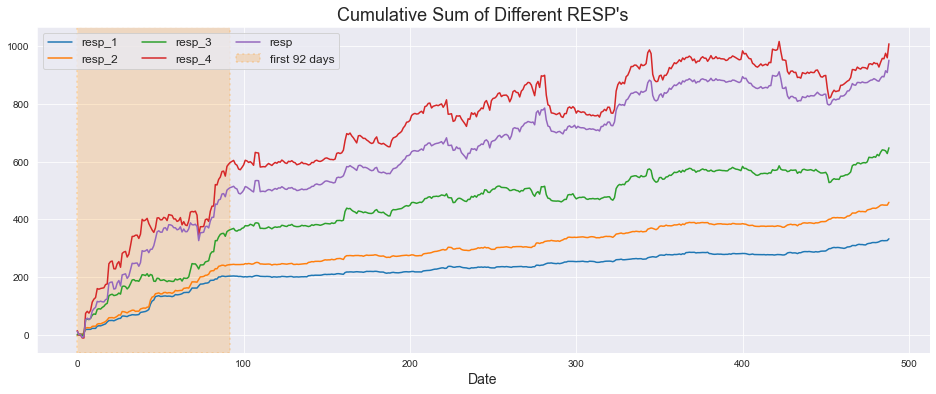

In [16]:
fig = plt.figure(figsize=(16,6))
ax = plt.subplot(1,1,1)
df.groupby('date')[['resp_1', 'resp_2', 'resp_3', 'resp_4', 'resp']].sum().cumsum().plot(ax=ax)
plt.title('Cumulative Sum of Different RESP\'s',fontsize=18)
plt.xlabel('Date',fontsize=14)
plt.axvspan(0,92,linestyle=':',linewidth=2,label='first 92 days',color='darkorange',alpha=.2)
plt.legend(fontsize=12,ncol=3,loc=2);

> ### It can be noticed the there were more gains in the first 92 days which leads to the insight mentioned by many kagglers that it may be a good idea to drop the observations before this point,
> ### We can also notice that resp_4 has the highest cumulative sum on the other hand resp_1 has the smallest cumulative sum.

### Now we plot the average of each Resp

In [17]:
fig = px.line(df.groupby('date')[['resp_1', 'resp_2', 'resp_3', 'resp_4','resp']].mean(),
              x= df.groupby('date')[['resp_1', 'resp_2', 'resp_3', 'resp_4','resp']].mean().index,
              y= ['resp_1', 'resp_2', 'resp_3', 'resp_4','resp'],
              title= '\naverage Resp per day')
fig.layout.xaxis.title = 'Day' 
fig.layout.yaxis.title = 'Avg Resp'
fig.show()

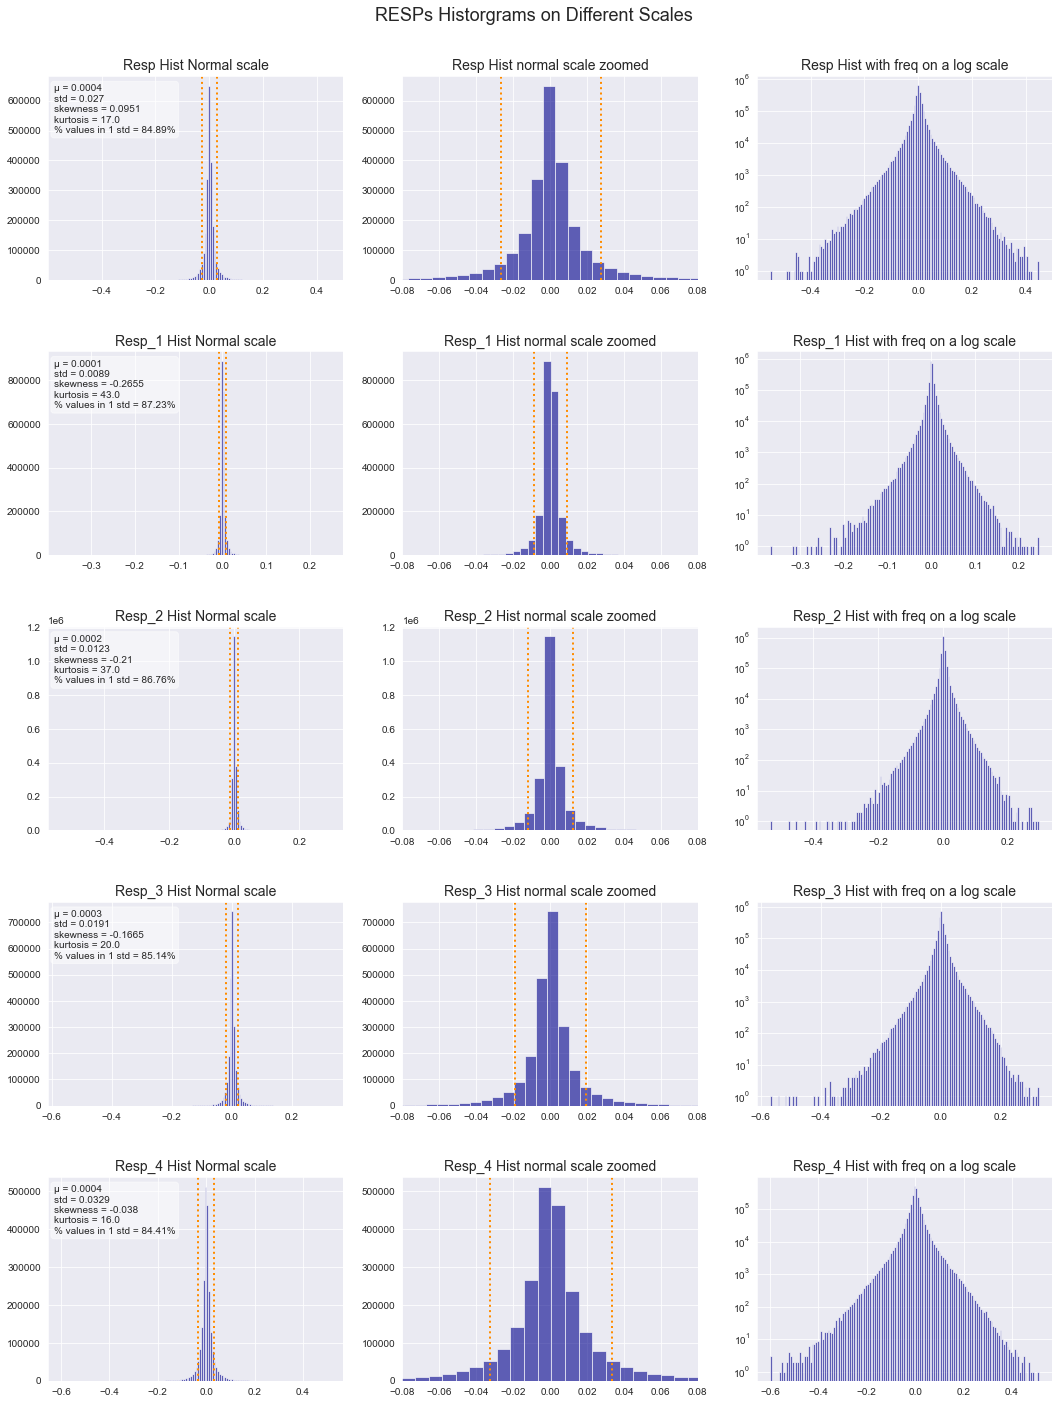

In [18]:
fig,((ax11,ax12,ax13),(ax21,ax22,ax23),(ax31,ax32,ax33),(ax41,ax42,ax43),(ax51,ax52,ax53)) = plt.subplots(5,3,figsize=(18,24))
plt.subplots_adjust(hspace=0.35)
ax11.hist(df.resp,bins=150, color='darkblue',alpha=.6)
ax11.axvline(df.resp.mean()+df.resp.std(),color='darkorange',linestyle=':',linewidth=2)
ax11.axvline(df.resp.mean()-df.resp.std(),color='darkorange',linestyle=':',linewidth=2)
df.resp.plot.hist(bins= 150,ax=ax12,color='darkblue',alpha=.6)
ax12.axvline(df.resp.mean()+df.resp.std(),color='darkorange',linestyle=':',linewidth=2)
ax12.axvline(df.resp.mean()-df.resp.std(),color='darkorange',linestyle=':',linewidth=2)
ax12.set_xlim(-.08,.08)
ax13.hist(df.resp,bins=150, color='darkblue',alpha=.6)
ax13.set_yscale('log')
skew= round(df.resp.skew(),4)
kurt= round(df.resp.kurtosis())
std1= round((((df.resp.mean()-df.resp.std()) < df.resp ) & (df.resp < (df.resp.mean()+df.resp.std()))).mean()*100,2)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax11.text(.02,.96,'μ = {}\nstd = {}\nskewness = {}\nkurtosis = {}\n% values in 1 std = {}%'.format(round(df.resp.mean(),4),round(df.resp.std(),4),skew,kurt,std1),
         transform=ax11.transAxes, verticalalignment='top',bbox=props,fontsize=10)
ax11.set_title('Resp Hist Normal scale',fontsize=14)
ax12.set_title('Resp Hist normal scale zoomed',fontsize=14)
ax13.set_title('Resp Hist with freq on a log scale',fontsize=14);
ax11.set_xlabel('')
ax11.set_ylabel('')
ax12.set_xlabel('')
ax12.set_ylabel('')
ax13.set_xlabel('')
ax13.set_ylabel('')
ax21.hist(df.resp_1,bins=150,color='darkblue',alpha=.6)
ax21.axvline(df.resp_1.mean()+df.resp_1.std(),color='darkorange',linestyle=':',linewidth=2)
ax21.axvline(df.resp_1.mean()-df.resp_1.std(),color='darkorange',linestyle=':',linewidth=2)
df.resp_1.plot.hist(bins= 150,ax=ax22,color='darkblue',alpha=.6)
ax22.axvline(df.resp_1.mean()+df.resp_1.std(),color='darkorange',linestyle=':',linewidth=2)
ax22.axvline(df.resp_1.mean()-df.resp_1.std(),color='darkorange',linestyle=':',linewidth=2)
ax22.set_xlim(-.08,.08)
ax23.hist(df.resp_1,bins=150,color='darkblue',alpha=.6)
ax23.set_yscale('log')
skew= round(df.resp_1.skew(),4)
kurt= round(df.resp_1.kurtosis())
std1= round((((df.resp_1.mean()-df.resp_1.std()) < df.resp_1 ) & (df.resp_1 < (df.resp_1.mean()+df.resp_1.std()))).mean()*100,2)
ax21.text(.02,.96,'μ = {}\nstd = {}\nskewness = {}\nkurtosis = {}\n% values in 1 std = {}%'.format(round(df.resp_1.mean(),4),round(df.resp_1.std(),4),skew,kurt,std1),
         transform=ax21.transAxes, verticalalignment='top',bbox=props,fontsize=10)
ax21.set_title('Resp_1 Hist Normal scale',fontsize=14)
ax22.set_title('Resp_1 Hist normal scale zoomed',fontsize=14)
ax23.set_title('Resp_1 Hist with freq on a log scale',fontsize=14);
ax21.set_xlabel('')
ax21.set_ylabel('')
ax22.set_xlabel('')
ax22.set_ylabel('')
ax23.set_xlabel('')
ax23.set_ylabel('')
ax31.hist(df.resp_2,bins=150,color='darkblue',alpha=.6)
ax31.axvline(df.resp_2.mean()+df.resp_2.std(),color='darkorange',linestyle=':',linewidth=2)
ax31.axvline(df.resp_2.mean()-df.resp_2.std(),color='darkorange',linestyle=':',linewidth=2)
df.resp_2.plot.hist(bins= 150,ax=ax32,color='darkblue',alpha=.6)
ax32.axvline(df.resp_2.mean()+df.resp_2.std(),color='darkorange',linestyle=':',linewidth=2)
ax32.axvline(df.resp_2.mean()-df.resp_2.std(),color='darkorange',linestyle=':',linewidth=2)
ax32.set_xlim(-.08,.08)
ax33.hist(df.resp_2,bins=150, color='darkblue',alpha=.6)
ax33.set_yscale('log')
skew= round(df.resp_2.skew(),4)
kurt= round(df.resp_2.kurtosis())
std1= round((((df.resp_2.mean()-df.resp_2.std()) < df.resp_2 ) & (df.resp_2 < (df.resp_2.mean()+df.resp_2.std()))).mean()*100,2)
ax31.text(.02,.96,'μ = {}\nstd = {}\nskewness = {}\nkurtosis = {}\n% values in 1 std = {}%'.format(round(df.resp_2.mean(),4),round(df.resp_2.std(),4),skew,kurt,std1),
         transform=ax31.transAxes, verticalalignment='top',bbox=props,fontsize=10)
ax31.set_title('Resp_2 Hist Normal scale',fontsize=14)
ax32.set_title('Resp_2 Hist normal scale zoomed',fontsize=14)
ax33.set_title('Resp_2 Hist with freq on a log scale',fontsize=14);
ax31.set_xlabel('')
ax31.set_ylabel('')
ax32.set_xlabel('')
ax32.set_ylabel('')
ax33.set_xlabel('')
ax33.set_ylabel('')
ax41.hist(df.resp_3, color='darkblue',alpha=.6,bins=150)
ax41.axvline(df.resp_3.mean()+df.resp_3.std(),color='darkorange',linestyle=':',linewidth=2)
ax41.axvline(df.resp_3.mean()-df.resp_3.std(),color='darkorange',linestyle=':',linewidth=2)
df.resp_3.plot.hist(bins=150, color='darkblue',alpha=.6,ax=ax42)
ax42.axvline(df.resp_3.mean()+df.resp_3.std(),color='darkorange',linestyle=':',linewidth=2)
ax42.axvline(df.resp_3.mean()-df.resp_3.std(),color='darkorange',linestyle=':',linewidth=2)
ax42.set_xlim(-.08,.08)
ax43.hist(df.resp_3, color='darkblue',alpha=.6,bins=150)
ax43.set_yscale('log')
skew= round(df.resp_3.skew(),4)
kurt= round(df.resp_3.kurtosis())
std1= round((((df.resp_3.mean()-df.resp_3.std()) < df.resp_3 ) & (df.resp_3 < (df.resp_3.mean()+df.resp_3.std()))).mean()*100,2)
ax41.text(.02,.96,'μ = {}\nstd = {}\nskewness = {}\nkurtosis = {}\n% values in 1 std = {}%'.format(round(df.resp_3.mean(),4),round(df.resp_3.std(),4),skew,kurt,std1),
         transform=ax41.transAxes, verticalalignment='top',bbox=props,fontsize=10)
ax41.set_title('Resp_3 Hist Normal scale',fontsize=14)
ax42.set_title('Resp_3 Hist normal scale zoomed',fontsize=14)
ax43.set_title('Resp_3 Hist with freq on a log scale',fontsize=14);
ax41.set_xlabel('')
ax41.set_ylabel('')
ax42.set_xlabel('')
ax42.set_ylabel('')
ax43.set_xlabel('')
ax43.set_ylabel('')
ax51.hist(df.resp_4,bins=150, color='darkblue',alpha=.6)
ax51.axvline(df.resp_4.mean()+df.resp_4.std(),color='darkorange',linestyle=':',linewidth=2)
ax51.axvline(df.resp_4.mean()-df.resp_4.std(),color='darkorange',linestyle=':',linewidth=2)
df.resp_4.plot.hist(bins= 150,color='darkblue',alpha=.6,ax=ax52)
ax52.axvline(df.resp_4.mean()+df.resp_4.std(),color='darkorange',linestyle=':',linewidth=2)
ax52.axvline(df.resp_4.mean()-df.resp_4.std(),color='darkorange',linestyle=':',linewidth=2)
ax52.set_xlim(-.08,.08)
ax53.hist(df.resp_4,bins=150,color='darkblue',alpha=.6)
ax53.set_yscale('log')
skew= round(df.resp_4.skew(),4)
kurt= round(df.resp_4.kurtosis())
std1= round((((df.resp_4.mean()-df.resp_4.std()) < df.resp_4 ) & (df.resp_4 < (df.resp_4.mean()+df.resp_4.std()))).mean()*100,2)
ax51.text(.02,.96,'μ = {}\nstd = {}\nskewness = {}\nkurtosis = {}\n% values in 1 std = {}%'.format(round(df.resp_4.mean(),4),round(df.resp_4.std(),4),skew,kurt,std1),
         transform=ax51.transAxes, verticalalignment='top',bbox=props,fontsize=10)
ax51.set_title('Resp_4 Hist Normal scale',fontsize=14)
ax52.set_title('Resp_4 Hist normal scale zoomed',fontsize=14)
ax53.set_title('Resp_4 Hist with freq on a log scale',fontsize=14)
ax51.set_xlabel('')
ax51.set_ylabel('')
ax52.set_xlabel('')
ax52.set_ylabel('')
ax53.set_xlabel('')
ax53.set_ylabel('')
fig.suptitle('RESPs Historgrams on Different Scales',fontsize=18,y=.92);

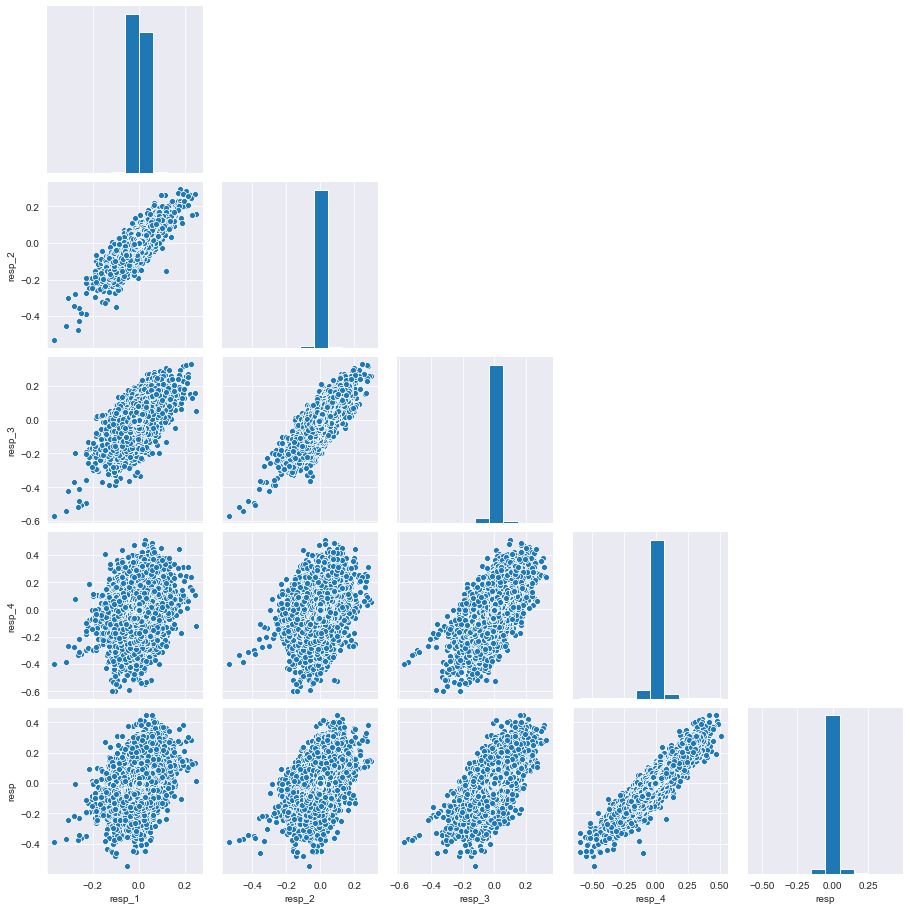

In [19]:
sns.pairplot(df[['resp_1', 'resp_2', 'resp_3', 'resp_4', 'resp']],corner=True);

we can see that Resp is highly related to Resp_4
also Resp_1 and Resp_2 are highly related to each other 
from the relation shown in this figure and the standard deviation and distribution shown in the figure before this one we can assume that Resp is more related to longer time horizon investments, as longer time horizon are associated with more return and higher risk

### [The Basics of Investment Time Horizons](https://www.investopedia.com/terms/t/timehorizon.asp)
> ####  An Investment Time Horizon is the period where one expects to hold an investment for a specific goal. Investments are generally broken down into two main categories: stocks (riskier) and bonds (less risky). The longer the Time Horizon, the more aggressive, or riskier portfolio, an investor can build. The shorter the Time Horizon, the more conservative, or less risky, the investor may want to adopt. 

[source: investopedia.com](https://www.investopedia.com/terms/t/timehorizon.asp)

<a id='date'></a>
## **Date**

### Checking the unique values of date

In [20]:
df.date.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

> ### The Date seems to contain 2 years of trading data since the trading days of the year are approximately 252 : 253 days
https://en.wikipedia.org/wiki/Trading_day

### Now we check the Resp Amount and Number of operations for each day

In [21]:
fig = px.area(data_frame= df.groupby('date')[['resp']].count(),title='Number of operation per day')
fig.update_traces( showlegend = False)
fig.layout.xaxis.title = 'Day' 
fig.layout.yaxis.title = 'Number of operations'
fig.show()

In [22]:
fig = px.area(data_frame= df.groupby('date')[['resp']].sum(),title='Resp sum of operation per day')
fig.update_traces( showlegend = False)
fig.layout.xaxis.title = 'Day' 
fig.layout.yaxis.title = 'Resp sum'
fig.show()

> ### It can be noticed that Resp has many fluctuation

### We will create a moving standard deviation of 20 days (which is a month of trading) for the average of resp

In [23]:
date_df = df.groupby('date')[['resp']].mean()
std20 = []
for i in range(len(date_df)):
    if i <20:
        std20.append(np.nan)
    else:
        moving_std = date_df['resp'][i-20:i].std()
        std20.append(moving_std)
date_df['moving_std'] = std20
date_df.tail(2)

resp  moving_std
date                      
487  -0.001340    0.001233
488   0.006156    0.001253

In [24]:
fig = px.line(data_frame=date_df,y=['resp','moving_std'],title='Average Resp & 20 day moving standard deviation')
fig.layout.xaxis.title = 'Day' 
fig.layout.yaxis.title = 'Avg Resp'
fig.show()

### Now we check the standard deviation of each resp for each day

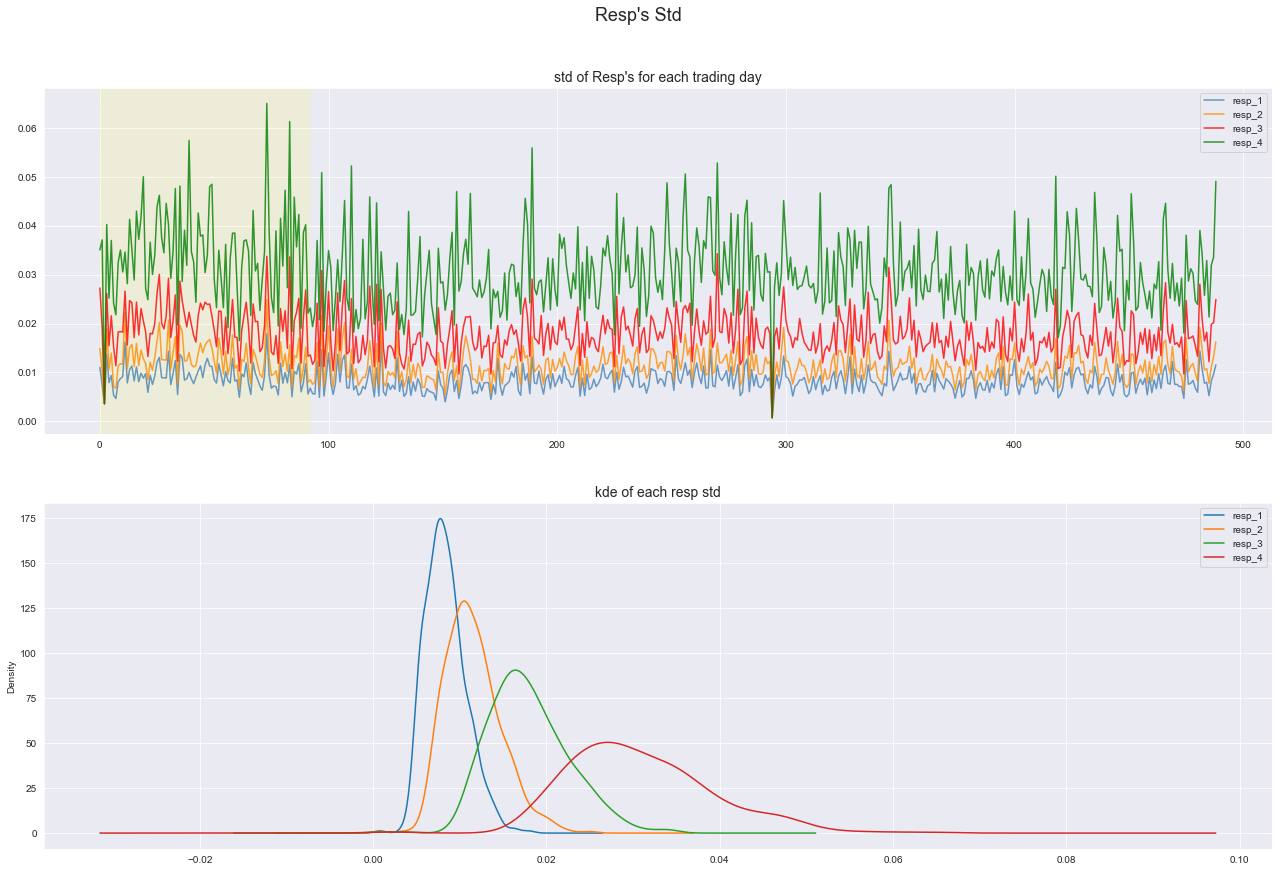

In [25]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(22,14))
df.groupby('date')[['resp_1', 'resp_2', 'resp_3', 'resp_4']].std().plot(ax=ax1,color=['steelblue','darkorange','red','green'],alpha=.8)
ax1.axvspan(0,92,linestyle=':',linewidth=2,label='first 92 days',color='yellow',alpha=.1)
df.groupby('date')[['resp_1', 'resp_2', 'resp_3', 'resp_4']].std().plot.kde(ax=ax2)
fig.suptitle('Resp\'s Std',fontsize=18,y=.96)
ax2.set_xlabel('')
ax1.set_xlabel('')
ax2.set_title('kde of each resp std', fontsize=14)
ax1.set_title('std of Resp\'s for each trading day',fontsize=14);

> ### As it was mentioned before the standard deviation seems to increase with resp mostly related to longer time horizon investments
> ### It can also be noticed that the deviation was kind of higher in the first 100 days as it was mentioned by many kagglers that there may was some kind of trading model adjustment done after the 80th day.

<a id='weight'></a>
## **Weight**

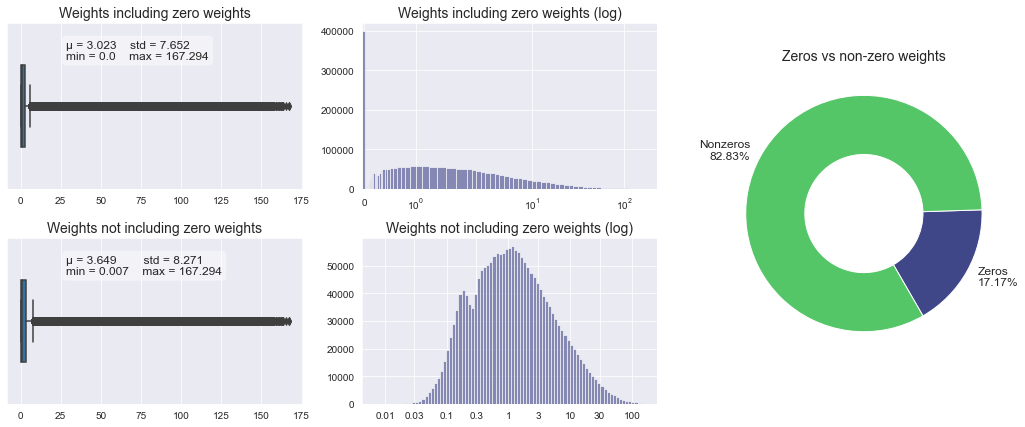

In [26]:
fig = plt.figure(figsize=(18,7))
grid =  gridspec.GridSpec(2,3,figure=fig,hspace=.3,wspace=.2)
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[0, 1])
ax3 = fig.add_subplot(grid[1, 0])
ax4 = fig.add_subplot(grid[1, 1])
ax5 = fig.add_subplot(grid[:, 2])
sns.boxplot(x = df.weight,width=.5,ax=ax1)
ax2.hist(df.weight, color='#404788ff',alpha=.6, bins= list([-.05] + list(10**np.arange(-2,2.24,.05))))
ax2.set_xscale('symlog')
ax2.set_xlim(-.05,227)
sns.boxplot(x = df.weight[df.weight != 0],width=.5,ax=ax3)
ax1.set_title('Weights including zero weights',fontsize=14)
ax3.set_title('Weights not including zero weights',fontsize=14)
ax2.set_title('Weights including zero weights (log)',fontsize=14)
ax4.set_title('Weights not including zero weights (log)',fontsize=14)
props = dict(boxstyle='round', facecolor='white', alpha=0.4)
ax1.text(.2,.9,'μ = {}    std = {}\nmin = {}    max = {}'.format(round(df.weight.mean(),3),round(df.weight.std(),3),round(df.weight.min(),3),round(df.weight.max(),3)),
         transform=ax1.transAxes, verticalalignment='top',bbox=props,fontsize=12)
ax3.text(.2,.9,'μ = {}        std = {}\nmin = {}    max = {}'.format(round(df.weight[df.weight != 0].mean(),3),round(df.weight[df.weight != 0].std(),3),
                                                              round(df.weight[df.weight != 0].min(),3),round(df.weight[df.weight != 0].max(),3)),
         transform=ax3.transAxes, verticalalignment='top',bbox=props,fontsize=12)
ax4.hist(df.weight[df.weight !=0],color='#404788ff',alpha=.6,bins=10**np.arange(-2.16,2.24,.05))
ax4.set_xscale('log')
ax4.set_xticks((.01,.03,.1,.3,1,3,10,30,100))
ax4.set_xticklabels((.01,.03,.1,.3,1,3,10,30,100))
ax5.pie(((df.weight==0).mean(),(1-(df.weight==0).mean())),startangle=300,wedgeprops=dict(width=0.5),
        labels=('Zeros\n{}%'.format(round((df.weight==0).mean()*100,2)),'Nonzeros\n{}%'.format(round((1-(df.weight==0).mean())*100,2))),
        textprops={'fontsize': 12},colors=['#404788ff','#55c667ff'])
ax5.set_title('Zeros vs non-zero weights',fontsize=14)
ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax2.set_ylabel('')
ax5.set_ylabel('')
ax4.set_xlabel('');

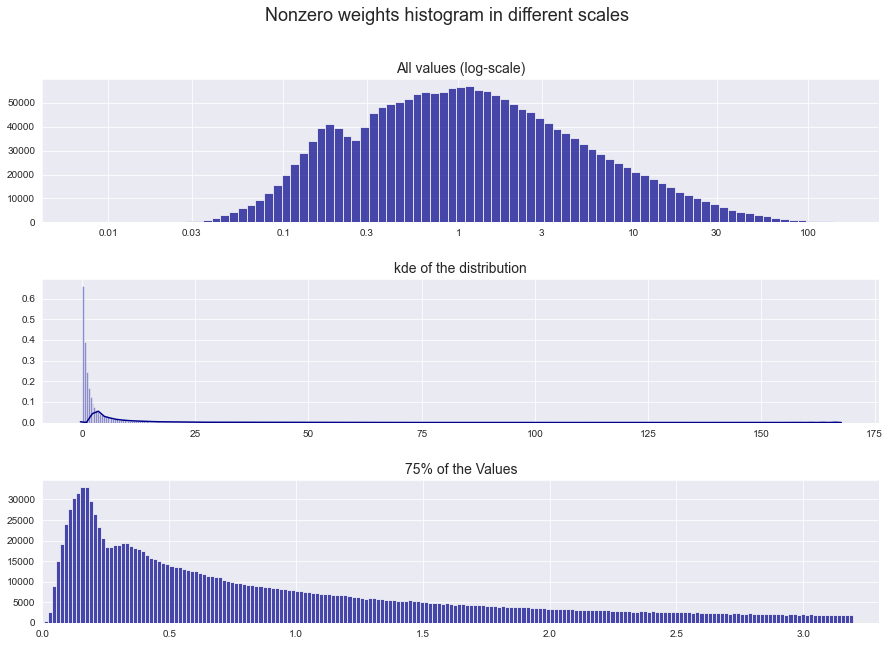

In [27]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Nonzero weights histogram in different scales',fontsize=18)
ax1 = plt.subplot(3,1,1)
ax1.hist(df.weight[df.weight !=0],color='darkblue',alpha=.7, bins=10**np.arange(-2.16,2.23,.05))
plt.xscale('log')
plt.xticks((.01,.03,.1,.3,1,3,10,30,100),(.01,.03,.1,.3,1,3,10,30,100))
ax2 = plt.subplot(3,1,2)
sns.distplot(df.weight[df.weight != 0], color='darkblue', bins=400, ax=ax2) 
ax3 = plt.subplot(3,1,3)
ax3.hist(df.weight[(df.weight !=0) & (df.weight < 3.197 )],color='darkblue',alpha=.7, bins=200)
ax3.set_xlim(0,3.3)
ax2.set_xlabel('') 
ax1.set_title('All values (log-scale)',fontsize=14)
ax2.set_title('kde of the distribution',fontsize=14)
ax3.set_title('75% of the Values',fontsize=14)
plt.subplots_adjust(hspace=.4);

### A deeper look at outliers

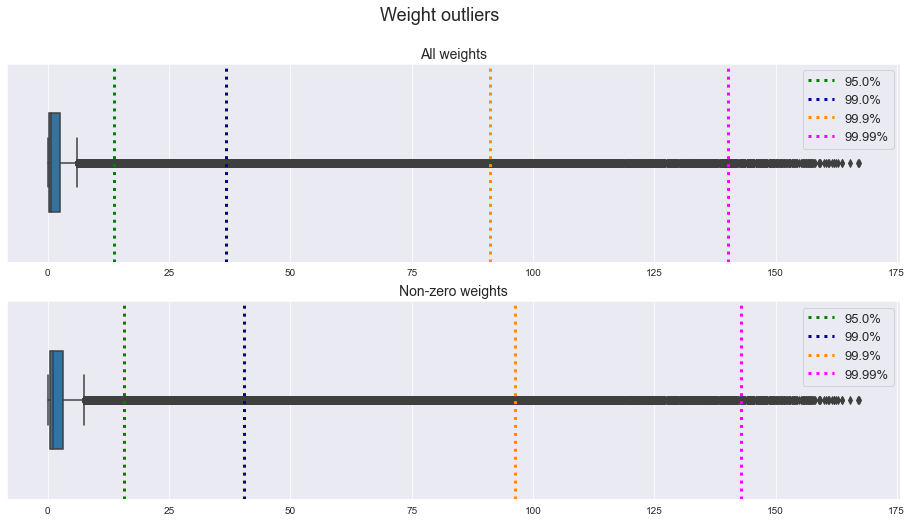

In [28]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(16,8))
fig.suptitle('Weight outliers',fontsize=18)
sns.boxplot(df.weight,width=.5, ax=ax1)
ax1.axvline(np.percentile(df.weight,95), color= 'green',label='95.0%',linestyle=':',linewidth=3)
ax1.axvline(np.percentile(df.weight,99), color= 'darkblue',label='99.0%',linestyle=':',linewidth=3)
ax1.axvline(np.percentile(df.weight,99.9), color= 'darkorange',label='99.9%',linestyle=':',linewidth=3)
ax1.axvline(np.percentile(df.weight,99.99), color= 'magenta',label='99.99%',linestyle=':',linewidth=3)
ax1.legend(fontsize=13)
sns.boxplot(df.weight[df.weight !=0],width=.5, ax=ax2)
ax2.axvline(np.percentile(df.weight[df.weight !=0],95), color= 'green',label='95.0%',linestyle=':',linewidth=3)
ax2.axvline(np.percentile(df.weight[df.weight !=0],99), color= 'darkblue',label='99.0%',linestyle=':',linewidth=3)
ax2.axvline(np.percentile(df.weight[df.weight !=0],99.9), color= 'darkorange',label='99.9%',linestyle=':',linewidth=3)
ax2.axvline(np.percentile(df.weight[df.weight !=0],99.99), color= 'magenta',label='99.99%',linestyle=':',linewidth=3)
ax2.legend(fontsize=13)
ax1.set_title('All weights', fontsize= 14)
ax2.set_title('Non-zero weights', fontsize= 14)
ax1.set_xlabel('')
ax2.set_xlabel('');

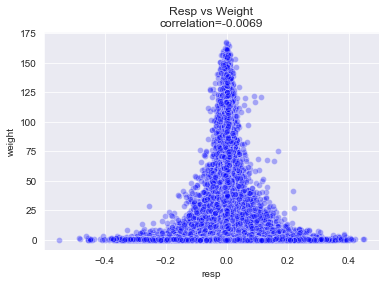

In [29]:
sns.scatterplot(data=df, x='resp',y='weight', color= 'blue', alpha=.3)
plt.title('Resp vs Weight\ncorrelation={}'.format(round(df.weight.corr(df.resp),4)));

> ### We can see that weight is not linearly correlated with Resp but it's clear that higher weight are only associated with low Resp values

<a id='features'></a>
# Features data analysis

### Loading the features csv

In [30]:
df_f =  pd.read_csv('C:\\Users\\emanu\\Downloads\\jane-street-market-prediction\\features.csv')
df_f.head(5)

feature  tag_0  tag_1  tag_2  tag_3  tag_4  tag_5  tag_6  tag_7  tag_8  \
0  feature_0  False  False  False  False  False  False  False  False  False   
1  feature_1  False  False  False  False  False  False   True   True  False   
2  feature_2  False  False  False  False  False  False   True   True  False   
3  feature_3  False  False  False  False  False  False   True  False   True   
4  feature_4  False  False  False  False  False  False   True  False   True   

   tag_9  tag_10  tag_11  tag_12  tag_13  tag_14  tag_15  tag_16  tag_17  \
0  False   False   False   False   False   False   False   False   False   
1  False   False   False   False   False   False   False   False   False   
2   True   False   False   False   False   False   False   False   False   
3  False   False   False   False   False   False   False   False   False   
4   True   False   False   False   False   False   False   False   False   

   tag_18  tag_19  tag_20  tag_21  tag_22  tag_23  tag_24  tag_25  tag_26  \
0   False   False   False   False   False   False   False   False   False   
1   False   False   False   False   False   False   False   False   False   
2   False   False   False   False   False   False   False   False   False   
3   False   False   False   False   False   False   False   False   False   
4   False   False   False   False   False   False   False   False   False   

   tag_27  tag_28  
0   False   False  
1   False   False  
2   False   False  
3   False   False  
4   False   False

In [31]:
fig = px.bar(df_f.set_index('feature').T.sum(), title='Number of tags for each feature')
fig.layout.xaxis.tickangle = 300
fig.update_traces( showlegend = False)
fig.layout.xaxis. dtick = 5
fig.layout.xaxis.title = ''
fig.layout.yaxis.title = ''
fig.show()

<a id='nulls'></a>
## **Exploring the Null values**

In [32]:
fig = px.bar(x = df.isnull().sum().index,y= df.isnull().sum().values,title= 'Number of Null values')
fig.layout.xaxis.tickangle = 300
fig.layout.xaxis. dtick = 5
fig.layout.yaxis. dtick = 100000
fig.layout.xaxis.title = ''
fig.layout.yaxis.title = ''
fig.layout.xaxis.showgrid = True
fig.show()

### Finding out the features with missing values more than 10 %

In [33]:
nulls = df.isnull().sum()
nulls_list = list(nulls[nulls >(0.1 * len(df))].index)
nulls_list

[]

#### **Looking into the relationship between these features since there is kind of pattern in the number of null values**

In [34]:
df[['resp','resp_1','resp_2','resp_3','resp_4','weight']+nulls_list].corr().style.background_gradient(cmap='coolwarm')

### Since the number of null values in these columns are huge (larger than one quarter of a million!) we will be dropping features with more than 10% null values since there is no correlation with any of these features and Resp's and weight.

In [35]:
df.drop(columns=nulls_list,inplace=True)

### now concerning the remaining nulls we will look firstly to the coefficient of variation

In [36]:
(df.iloc[:,7:-2].std() / df.iloc[:,7:-2].mean()).head(5)

feature_0     99.409142
feature_1      6.608129
feature_2      6.913306
feature_3    209.033875
feature_4    354.339813
dtype: float32

#### the coefficient of variation seems unreliable due to the value of the mean being near to zero

### Now we can take a bird's-eye view  of features distributions

In [38]:
# df.iloc[:,7:-2].hist(bins=100,figsize=(20,74),layout=(29,14));

### **The following code will make a grid of horizontal box plot with the mean ploted too to get a comprehensive solid understanding of the features distributions**
> #### please note that I used customized 0.1%:99.9% whisker to show extreme outliers since the data is strongly centered.

In [ ]:
fig = plt.figure(figsize=(20,80))
fig.suptitle('Features Box plot with 0.1% 99.9% whiskers',fontsize=22, y=.89)
grid =  gridspec.GridSpec(29,4,figure=fig,hspace=.5,wspace=.05)
featstr = [i for i in df.columns[7:-2]]
counter = 0
for i in range(29):
    for j in range(4):
        subf = fig.add_subplot(grid[i, j]);
        sns.boxplot(x= df[featstr[counter]],saturation=.5,color= 'blue', ax= subf,width=.5,whis=(.1,99.9));
        subf.axvline(df[featstr[counter]].mean(),color= 'darkorange', label='Mean', linestyle=':',linewidth=3)
        subf.set_xlabel('')
        subf.set_title('{}'.format(featstr[counter]),fontsize=16)
        counter += 1
        gc.collect()
plt.show();

### We can see that there is a lot of outliers affecting the distribution of each feature.
### Also since the majority of values are heavily centerd around the mean, we will fill null values using the mean.

In [ ]:
df.fillna(df.mean(axis=0),inplace=True)

<a id='growth'></a>
## Features growth 

In [ ]:
df.groupby('date')[featstr].mean().cumsum().plot(layout=(29,4),subplots=True,figsize=(20,82),xlabel='')
fig = plt.gcf()
fig.text(0.5, 0.19, 'Date',ha='center', fontsize = 24)
fig.suptitle('Cumulative features means per day',fontsize=24,y=.886);

> ### Many features cumulative mean seem to be linearly growing but some features like 81, 82, and 83 are actually decreasing, and there are some features that fluctuate like feature 3

<a id='multicollinearity'></a>
## Correlation between features

### First we make a correlation dataframe

In [ ]:
corr = df.iloc[:,7:-2].corr()

In [ ]:
corr.style.background_gradient(cmap='coolwarm')

### Plotting a heatmap for features correlation

In [ ]:
fig = plt.figure(figsize=(18,12))
ax = plt.subplot(1,1,1)
sns.heatmap(corr,ax= ax, cmap='coolwarm');

>### **It looks like there is a lot of multicollinearity between features and also it looks like there is a pattern of couples in the features space and this pattern is kind of broke at some features  like feature_41**

In [ ]:
featstr2 = [ i for i in featstr if i not in ['feature_41','feature_64']]
len(featstr)

In [ ]:
fig = plt.figure(figsize=(22,44))
grid =  gridspec.GridSpec(12,5,figure=fig,hspace=.5,wspace=.2)
counter = 1
for i in range(12):
    for j in range(5):
        if counter == 113:
            break
        subf = fig.add_subplot(grid[i, j]);
        sns.scatterplot(x= df[featstr2[counter]], y = df[featstr2[counter+1]], ax= subf);
        cor = round(df[featstr2[counter]].corr(df[featstr2[counter+1]]) * 100,2)
        subf.set_xlabel('')
        subf.set_ylabel('')
        subf.set_title('{} & {}\nCorrelation = {}%'.format(featstr2[counter],featstr2[counter+1],cor),fontsize=14)
        counter += 2
        gc.collect();  

> ### As expected since these are finance related features a lot of features are highly correlate with each other

### Now we explore highly correlated groups of features

#### We start off with featrues: **[feature_19, feature_20, feature_21, feature_22, feature_23, feature_24, feature_25, feature_26, feature_29]** since there is kind of multicollinearity cluster

In [ ]:
plt.figure(figsize=(12,6)) 
sns.heatmap(df[featstr2[15:23]].corr(),center=0,cmap='coolwarm',annot=True,cbar=False);

In [ ]:
sns.pairplot(df[featstr2[15:23]],corner=True);

> ### Despite the fact that Pearson coefficients of correlation are really high between these features the relationships are not completely linear, also it can be noticed that the outliers affect the shape of scatter plots.

### Now we check the correlation again but between other group 

In [ ]:
plt.figure(figsize=(12,6)) 
sns.heatmap(df[featstr2[23:31]].corr(),center=0,cmap='coolwarm',annot=True,cbar=False);

In [ ]:
sns.pairplot(df[featstr2[23:31]],corner=True);

> ### things looks almost the same with the other cluster, it  also worth mentioning that both of these features clusters are negatively correlated with each other.

In [ ]:
plt.figure(figsize=(18,6)) 
sns.heatmap(df[featstr2[15:31]].corr(),center=0,cmap='coolwarm',annot=True,cbar=False);

> <a id='outlier'></a>
## Outliers

### First we take a look at the mean of features.

In [ ]:
fig = px.bar(df[featstr].mean(), title='Features mean values')
fig.layout.xaxis.tickangle = 300
fig.update_traces(showlegend = False)
fig.layout.xaxis. dtick = 5
fig.layout.xaxis.title = ''
fig.layout.yaxis.title = ''
fig.show()

In [ ]:
fig = px.bar(df[featstr].max(), title='Features Max Values')
fig.layout.xaxis.tickangle = 300
fig.update_traces(showlegend = False)
fig.layout.xaxis. dtick = 5
fig.layout.xaxis.title = ''
fig.layout.yaxis.title = ''
fig.show()

In [ ]:
fig = px.bar(df[featstr].min(), title='Features Min Values')
fig.layout.xaxis.tickangle = 300
fig.update_traces(showlegend = False)
fig.layout.xaxis. dtick = 5
fig.layout.xaxis.title = ''
fig.layout.yaxis.title = ''
fig.show()

In [ ]:
fig, (ax1,ax2,ax3)= plt.subplots(3,1,figsize=(10,12))
plt.subplots_adjust(hspace=.3)
sns.distplot(df[featstr].max(),ax= ax1 )
sns.distplot(df[featstr].min(),ax= ax2)
sns.distplot(df[featstr].mean(),ax= ax3)
fig.suptitle('distribution of mean max and min for features',fontsize=16)
ax1.set_title('distribution  of features max values',fontsize=14)
ax1.text(.82,.56,'std = {}'.format(round(df[featstr].max().std(),2)),transform=ax1.transAxes, verticalalignment='top',bbox=props,fontsize=12)
ax2.set_title('distribution  of features min values',fontsize=14)
ax2.text(.82,.56,'std = {}'.format(round(df[featstr].min().std(),2)),transform=ax2.transAxes, verticalalignment='top',bbox=props,fontsize=12)
ax3.set_title('distribution  of features mean values',fontsize=14)
ax3.text(.82,.56,'std = {}'.format(round(df[featstr].mean().std(),2)),transform=ax3.transAxes, verticalalignment='top',bbox=props,fontsize=12);

> ### We can see that despite the fact the mean values are not that different from each other the min and max values are very deviated with highly skewed distribution

### A more statistically oriented exploring to outliers

In [ ]:
for i in featstr[1:]:
    print('{}\n0.1%:99.9% are between: {}\nmax: {}\nmin: {}\n75% are under: {}'.format(i,np.percentile(df[i],(.1,99.9)), df[i].max(),df[i].min(),np.percentile(df[i],75)),
         '\n===============================')

In [ ]:
df[(df.feature_56== df.feature_56.max())|(df.feature_57== df.feature_57.max())|(df.feature_58== df.feature_58.max()) | (df.feature_59== df.feature_59.max())]

> ### It can be inferred that the dataset has extreme outliers it also worth mentioning that some of outliers are accompanied with large values from neighbor columns which is a result of high multicollinearity between features

### Now we will make a bold move by removing these extreme outliers that are above 99.9% of feature data
#### To avoid removing more data while looping through the data set we will make a list of 99.9% mark for each and every single feature, We will also create a list for negative outliers values "using .1 % mark" to be explored later 

In [ ]:
n999 = [ np.percentile(df[i],99.9) for i in featstr[1:]]
n001 = [ np.percentile(df[i],.1) for i in featstr[1:]]

In [ ]:
for i, j in enumerate(featstr[1:]):
    df = df[df[j] < n999[i]]
    gc.collect()

### Finding the ratio of the data lost in removing the outliers

In [ ]:
str(round(((org_len - len(df))/org_len)*100,2))+'%'

In [ ]:
fig = px.bar(df[featstr].max(), title='Features Max Values')
fig.layout.xaxis.tickangle = 300
fig.update_traces(showlegend = False)
fig.layout.xaxis. dtick = 5
fig.layout.xaxis.title = ''
fig.layout.yaxis.title = ''
fig.show()

### Now we make a boxplot grid again with customized .1% : 99.9% whiskers.

In [ ]:
fig = plt.figure(figsize=(20,80))
fig.suptitle('Features Box plot with 0.1% 99.9% whiskers',fontsize=22, y=.89)
grid =  gridspec.GridSpec(29,4,figure=fig,hspace=.5,wspace=.05)
counter = 0
for i in range(29):
    for j in range(4):
        subf = fig.add_subplot(grid[i, j]);
        sns.boxplot(x= df[featstr[counter]],saturation=.5,color= 'blue', ax= subf,width=.5,whis=(.1,99.9));
        subf.set_xlabel('')
        subf.set_title('{}'.format(featstr[counter]),fontsize=16)
        counter += 1
        gc.collect();

> ### The dataset still has many obvious outliers especially negative values since we only removed positive outliers so features which used to have symmetrical outliers now have some kind of left skewed outliers.
>### comparing both of the boxplots (before and after removing positive outliers) we can notice features from feature_3 to feature_40 which used to have symmetrical outliers now changed to have extreme negative outliers after trimming



### Manual outlier trimming to these features

In [ ]:
for i,j in zip(featstr[1:][2:34],n001[2:34]):
    df = df[df[i] > j]
    gc.collect();

### The following code shows the ratio of observations lost because of cleaning so far

In [ ]:
str(round(((org_len - len(df))/org_len)*100,2))+'%'

### The kde's and histograms of features after dropping outliers and taking in consideration Resp value 

In [ ]:
fig = plt.figure(figsize=(20,80))
fig.suptitle('KDE plot of Features',fontsize=24,transform =fig.transFigure, y=.89)
grid =  gridspec.GridSpec(29,4,figure=fig,hspace=.5,wspace=.01)
counter = 0
for i in range(29):
    for j in range(4):
        subf = fig.add_subplot(grid[i, j]);
        sns.distplot(df[df.action==0][featstr[counter]],bins= 100,label='Negative',
                     color='darkorange', kde_kws={'linewidth':4},ax=subf)
        sns.distplot(df[df.action!=0][featstr[counter]],bins= 100,label='Positive',
                     color='blue', kde_kws={'alpha':.9,'linewidth':2},hist_kws={'alpha':.3},ax=subf)
        subf.axvline(np.percentile(df[featstr[counter]],99.5),color= 'darkblue', label='99.5%', linestyle=':',linewidth=2)
        subf.axvline(np.percentile(df[featstr[counter]],.5),color= 'red', label='0.5%', linestyle=':',linewidth=2)
        subf.legend().set_visible(False)
        subf.set_xlabel('')
        subf.set_title('{}'.format(featstr[counter]),fontsize=16)
        kurt=round(df[featstr[counter]].kurt(),2)
        skew=round(df[featstr[counter]].skew(),2)
        subf.text(.6,.92,'Kurt = {:.2f}\nSkew = {:.2f}'.format(kurt ,skew),
         transform=subf.transAxes, verticalalignment='top',bbox=props,fontsize=10)
        counter += 1
        gc.collect();
handles, labels = subf.get_legend_handles_labels()
fig.legend(handles, labels,ncol=4, bbox_to_anchor=(0.86, 0.893),fontsize=10,
           title= 'Resp',title_fontsize=14,bbox_transform =fig.transFigure);

> ### By Adding Resp value to the features distributions can now see the following:
- The histograms of features now have way less outliers and more formal distribution.
- We can also see that some features like 1, 2, 85, 87, 88 and 91 have many negative outliers values.
- Some features like 49, 50, 51, 55, 56, 57, 58, and 59 still have many positive outliers.
- Features distributions are not affected by the resp value.

### Features and resp Correlation

### First we make a correlation pandas series for the relationship between resp and each feature

In [ ]:
respcorr =  pd.Series([ df.resp.corr(df[i]) for i in featstr],index=featstr)

In [ ]:
fig = px.bar(respcorr,color = respcorr, color_continuous_scale=['red','blue'], title= 'Features Correlation with Resp')
fig.layout.xaxis.tickangle = 300
fig.layout.xaxis. dtick = 5
fig.layout.xaxis.title = ''
fig.layout.yaxis.title = 'pearson correlation'
fig.update(layout_coloraxis_showscale=False)
fig.show();

> ### We can see that features are not really correlated to Resp

### Features and Weight

### Again we make a pandas series of weight correlation with feature but only taking in consideration weights larger than 0

In [ ]:
wecorr = pd.Series([df[df.weight != 0].weight.corr(df[df.weight != 0][i]) for i in featstr],index=featstr)

In [ ]:
wecorr.head(10)

In [ ]:
fig = px.bar(wecorr,title= 'Features Correlation with Weight (not including zero weights)')
fig.layout.xaxis.tickangle = 300
fig.layout.xaxis. dtick = 5
fig.layout.xaxis.title = ''
fig.layout.yaxis.title = 'pearson correlation'
fig.update(layout_coloraxis_showscale=False)
fig.update_layout(showlegend=False)
fig.show()

### We explore largest and lowest correlation coefficients with a scatter plots

### first we start with highest correlation which belongs to features 51 

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.scatterplot(df[df.weight != 0].weight,df[df.weight != 0].feature_51, color = 'darkblue', alpha=.3)
plt.xlabel('Weight',fontsize=14)
plt.ylabel('Featre_51',fontsize=14)
plt.title('Feature_51 vs Weight\nCorrelation = {}%'.format(round(df[df.weight != 0].weight.corr(df[df.weight != 0].feature_51),4)*100),fontsize=16);

> ### It seems that weight is highly correlated to feature 51

### Now we check the lowest correlation

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.scatterplot(df[df.weight != 0].weight,df[df.weight != 0].feature_126, color = 'darkblue', alpha=.3)
plt.xlabel('Weight',fontsize=14)
plt.ylabel('Featre_126',fontsize=14)
plt.title('Feature_126 vs Weight\nCorrelation{}%'.format(round(df[df.weight != 0].weight.corr(df[df.weight != 0].feature_126),4)*100),fontsize=16);

> ### While there is some kind negative correlation between weight and feature 126 the relation seem to be weak

<a id='f0'></a>
## **Feature 0**

### Finding the unique values of Feature 0

In [ ]:
plt.figure(figsize=(7,5)) 
df.feature_0.value_counts().plot.bar(color='darkblue',alpha=.6,width=.5)
plt.title('Feature_0',fontsize=18) 
plt.xticks(rotation=0,fontsize=14);

> ### Feature_0 seem to be some kind of binary feature

### Taking Resp value in consideration

In [ ]:
plt.figure(figsize=(8,6)) 
sns.countplot(data=df, x='feature_0', hue='action',palette='viridis')
plt.xticks(fontsize=14)
plt.yticks(fontsize=13)
plt.xlabel('Feature 0',fontsize=12)
plt.title('Feature 0 and Resp', fontsize=18)
plt.ylabel('')
plt.xlim(-1,2)
h, l = plt.gca().get_legend_handles_labels()
plt.legend(h,['Negative','Positive'],ncol=1, fontsize=12, loc=3,title= 'Resp',title_fontsize=14);

> ### seems like there is not an obvious relation between feature_0 and resp being negative or positive

<a id='pcacls'></a>
# PCA & Clustering

<a id='pca'></a>
## PCA Starter

### First we scale the data

In [ ]:
scaler = scale()

In [ ]:
scaler.fit(df[featstr[1:]])

In [ ]:
df_pca = pd.DataFrame(scaler.transform(df[featstr[1:]]))
df_pca.columns = featstr[1:]
gc.collect()
df_pca.head()

### Reduce the dimensionality of the data to 8 principal components

In [ ]:
pca =  PCA(n_components= 8).fit(df_pca)

In [ ]:
df_pca = pd.DataFrame(pca.transform(df_pca))

In [ ]:
pcs = ['pc'+str(i+1) for i in range(8)]

### Adding weight, Resp and action to the new dataframe

In [ ]:
df_pca.columns = pcs
df_pca['action'] = df.action.values
df_pca['weight'] = df.weight.values
df_pca['resp'] = df.resp.values
df_pca.head()

### Exploring correlation in the PCA dataframe

In [ ]:
df_pca.corr().style.background_gradient(cmap='coolwarm')

> ### PCA did't really help as principal components still don't have a clear relation with resp

<a id='cluster'></a>
## Clustering

### Exploring the possible clusters in the PCA dataframe

In [ ]:
kmeans = k_means(n_clusters= 8, max_iter= 400, random_state= 0,X=df_pca[pcs])

### Adding the clusters to the PCA dataframe

In [ ]:
df_pca['cluster'] = kmeans[1]
df_pca['cluster'] = df_pca['cluster'].astype('category')
df_pca.head(8)

### Plotting the relation between clusters and Resp

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(1,1,1)
sns.countplot(data=df_pca,x='cluster',hue='action',ax=ax,palette='viridis')
h, l = plt.gca().get_legend_handles_labels()
plt.legend(h,['Negative','Positive'],ncol= 1, fontsize= 12, loc= 1,title= 'Resp',title_fontsize=14)
plt.xlabel('Clusters',fontsize=18)
plt.ylabel('')
plt.xticks(fontsize=14) 
plt.title('PCA Clusters and Resp', fontsize=22);

> ### Clusters seem to be also scattered with no clear relation between a cluster and resp

# <font color='green'>Work in progress  █████████▒</font> 